In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Метод опорных векторов (SVM)

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

## C = inf

In [ ]:
iris = datasets.load_iris() # датасет с данными об ирисах, собранный Фишером, содержит три вида ирисов
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Обучим классификатор с бесконечным штрафом за неправильную классификацию 

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf) 
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [ ]:
# handson-ml course 
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', label='Опорные векторы')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

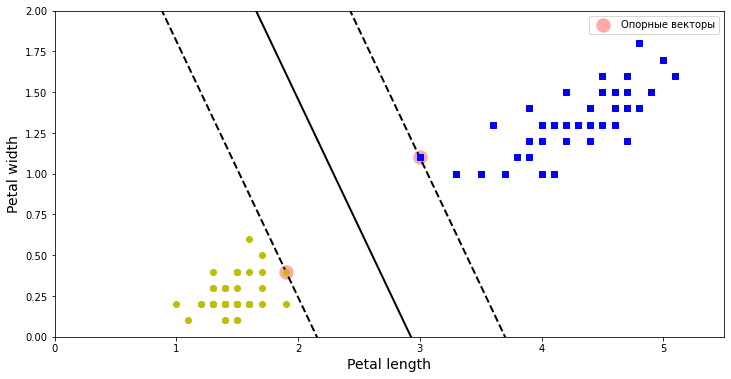

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12, 6))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

Подпишите на графике опорные вектора. Что они собой представляют?

_Опорные вектора из себя представляют объекты классов, расстояние от которых до разделяющей гиперплоскости минимально (что наглядно видно на графике выше)._


Добавим один выброс

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf) 
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=inf, kernel='linear')

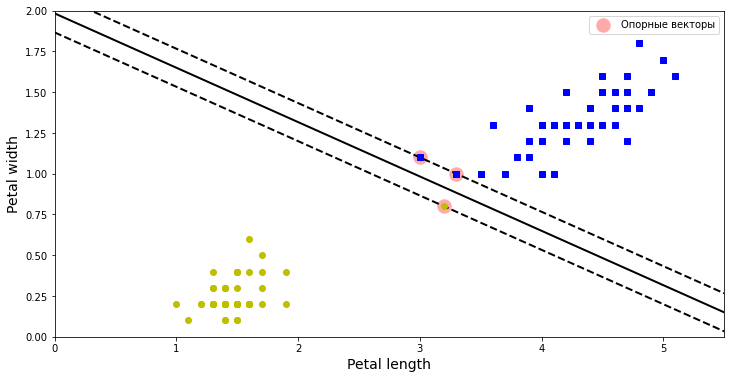

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12, 6))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

Объясните, почему полученное решение плохое. 

_Решение не является удовлетворительным, поскольку мы минимизируем расстояние именно до опорных векторов, а их выбор опорных векторов явно смещён в сторону синего кластера (как раз-таки из-за выброса, который сильно сдвинул разделяющую гиперплоскость). По итогу имеем плохое разделение._

Теперь добавим другой выброс

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])



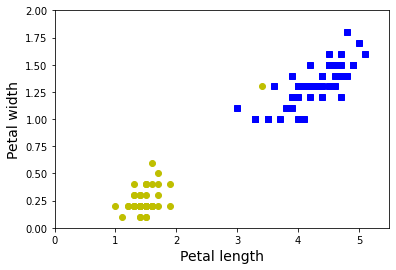

In [ ]:
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Объясните, почему ниже расположенная строчка кода приводит к зависанию

In [ ]:
#svm_clf = SVC(kernel="linear", C=np.inf) 
#svm_clf.fit(X_out, y_out)

_Зависание происходит из-за того, что метод попросту не может провести правильным образом прямую и подобрать опорные векторы :(_  
_P.S. В колабе вообще лучше её не запускать - виснет вся среда выполнения :)_

## Чувствительность к масштабу признаков

(-2.0, 2.0, -2.0, 2.0)

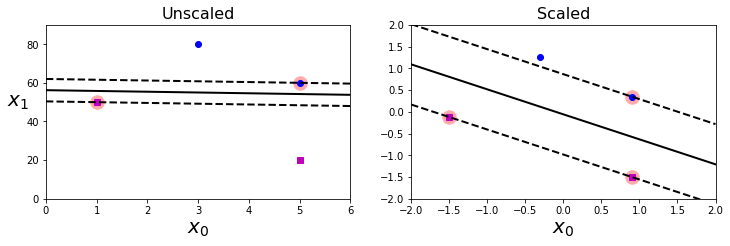

In [ ]:
# handson-ml course 

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

Чувствителен ли SVM к масштабу признаков? 

_Да, потому что вычисляется (и минимизируется) евклидово расстояние, которое меняется при нормализации. В итоге имеем другие масштабы (и, как следствие, изменения в опорных векторах и гиперплоскости, например)._

Какой еще алгоритм из разобранных ранее крайне чувствителен к масштабу признаков?

_Крайне чувствителен к масштабированию метод k-средних._

## Разные значения C

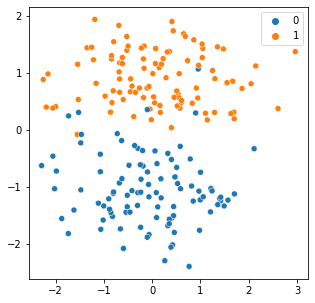

In [ ]:
X, Y = datasets.make_classification(n_features=2, 
                                       n_redundant=0,
                                       n_informative=1,
                                       random_state=202, 
                                       n_clusters_per_class=1,
                                       flip_y=0, 
                                       n_samples=200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 1], y=X[:, 0], hue=Y)
plt.show()

Продемонстрируйте (при помощи графиков и используя датасет, сгенерированный в предыдущей ячейке), как меняется граница решений для kernel="linear" в зависимости от значения C

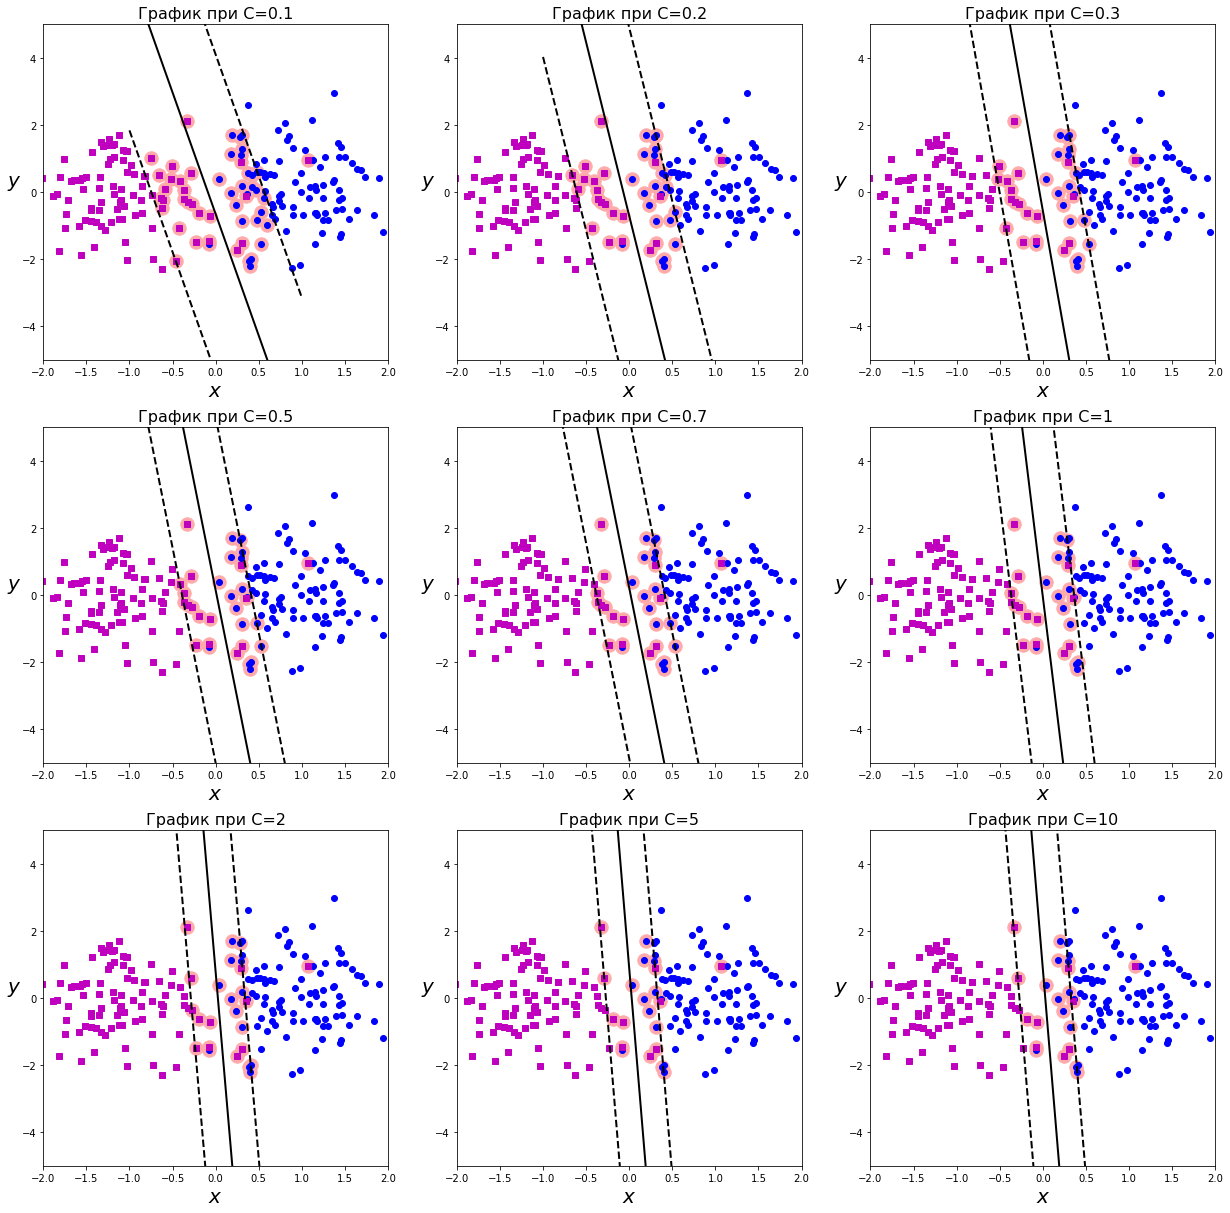

In [ ]:
plt.figure(figsize=(21, 21))
C = [0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]
for i, C in enumerate(C):
    plt.subplot(3, 3, i+1)
    svm_clf = SVC(kernel="linear", C=C)
    svm_clf.fit(X, Y)
    plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
    plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
    plot_svc_decision_boundary(svm_clf, -1, 1)
    plt.xlabel("$x$", fontsize=20)
    plt.ylabel("$y$  ", fontsize=20, rotation=0)
    plt.title(f'График при С={C}', fontsize=16)
    plt.axis([-2, 2, -5, 5])

Как связан bias-variance trade-off с значением параметра C

_Из графиков выше видно, что при увеличении параметра С от 1 до 10 (то есть уменьшение регуляризации) линия разделения становится более "чёткой" и конкретной(что не слишком хорошо, поскольку приводит к переобучению, сложность увеличивается), при уменьшении параметра от 1 до 0.01 регуляризация наоборот усиливается, прямая сдвигается, сложность уменьшается. Таким образом, необходимо искать некоторый промежуточный вариант между переобучением и излишней регуляризацией._

## Разные ядра

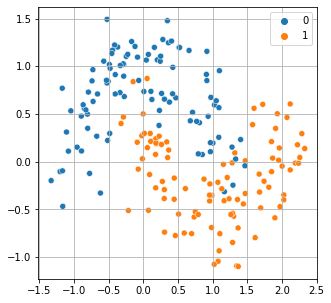

In [ ]:
X, Y = datasets.make_moons(n_samples=200, 
                           noise=0.25,
                           random_state=200)
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.grid(True, which='both')
plt.show()

In [ ]:
# handson-ml course 

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 500)
    x1s = np.linspace(axes[2], axes[3], 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

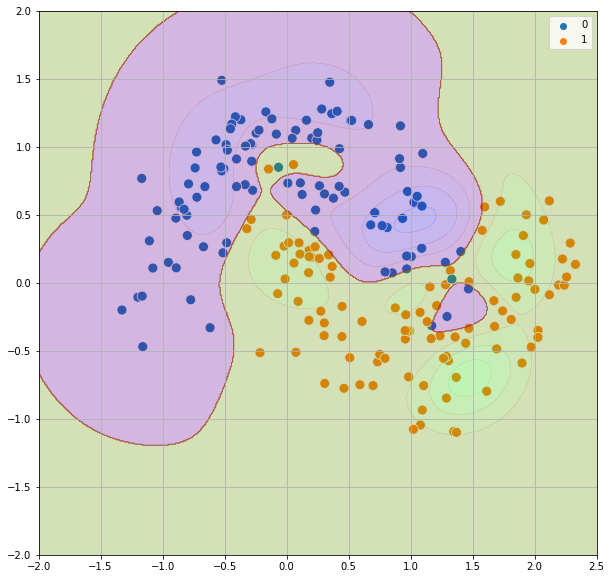

In [ ]:
svm = SVC(kernel="rbf", gamma=5, C=1000)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Постройте decision border для kernel="poly" для значений degree 3, 5, 10 и 20. C поставьте равным 10 

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x$", fontsize=20)
    plt.ylabel(r"$y$", fontsize=20, rotation=0)
    

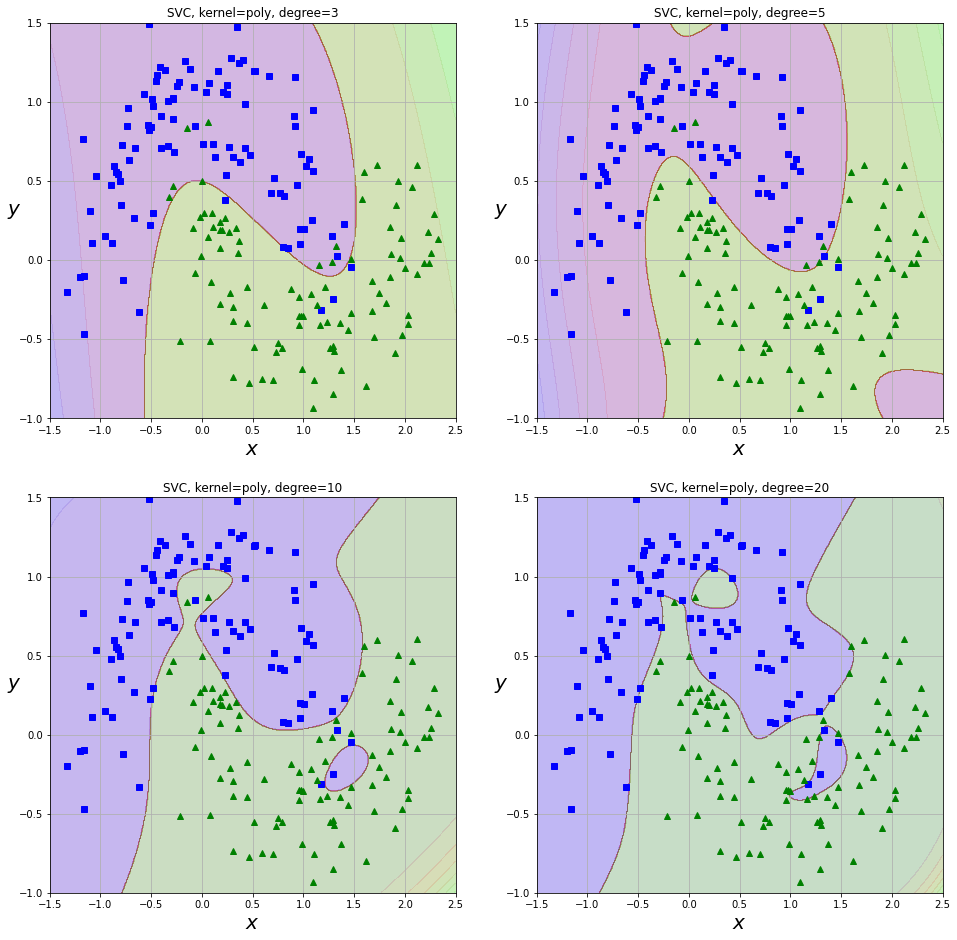

In [ ]:
plt.figure(figsize=(16,16))
degrees = [3, 5, 10, 20]
axes = [-1.5, 2.5, -1, 1.5]

for i, degree in enumerate(degrees):
  plt.subplot(2, 2, i+1)
  clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=1, C=10))
    ])
  clf.fit(X, Y)
  plot_predictions(clf, axes)
  plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "bs")
  plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x$", fontsize=20)
  plt.ylabel(r"$y$", fontsize=20, rotation=0)
  plt.title(f'SVC, kernel=poly, degree={degree}')


Используя построенные графики скажите, какая степень полинома дает лучшее решение?  

_Исходя из полученных результатов полином 5ой степени даёт лучшее решение, поскольку уже на примере 10ой степени видно, что разделение становится "подогнанным" к данным (на 20 вообще "идеальное" разделение, явное переобучение), поэтому остановим выбор на полиноме степени 5._

Как думаете, будет ли зависеть потребление памяти моделью от степени полинома?

_Предположу, что зависимость есть._

Проверьте свои догадки при помощи функции memit jupyter-notebook https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

In [ ]:
pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=c6509b9508a2f7ab79afbab390e0e28544ec46c1f933cfd1ce8c27e5a2650d0e
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

In [ ]:
%%memit
clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
    ])
clf.fit(X, Y)

peak memory: 283.34 MiB, increment: 0.00 MiB


In [ ]:
%%memit
clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=20, coef0=1, C=10))
    ])
clf.fit(X, Y)

peak memory: 283.34 MiB, increment: 0.00 MiB


_Оказалось, что зависимости нет, хотя казалось, что есть :)_

Постройте decision border для kernel="rbf" для значений gamma=0.1, 3 и 0.5 и C =0.001, 1000.

In [ ]:
import itertools
parameters = [
    [0.1, 0.5, 3],
    [0.001, 1000]
]
parameters_grid = list(itertools.product(*parameters))
print(parameters_grid)

[(0.1, 0.001), (0.1, 1000), (0.5, 0.001), (0.5, 1000), (3, 0.001), (3, 1000)]


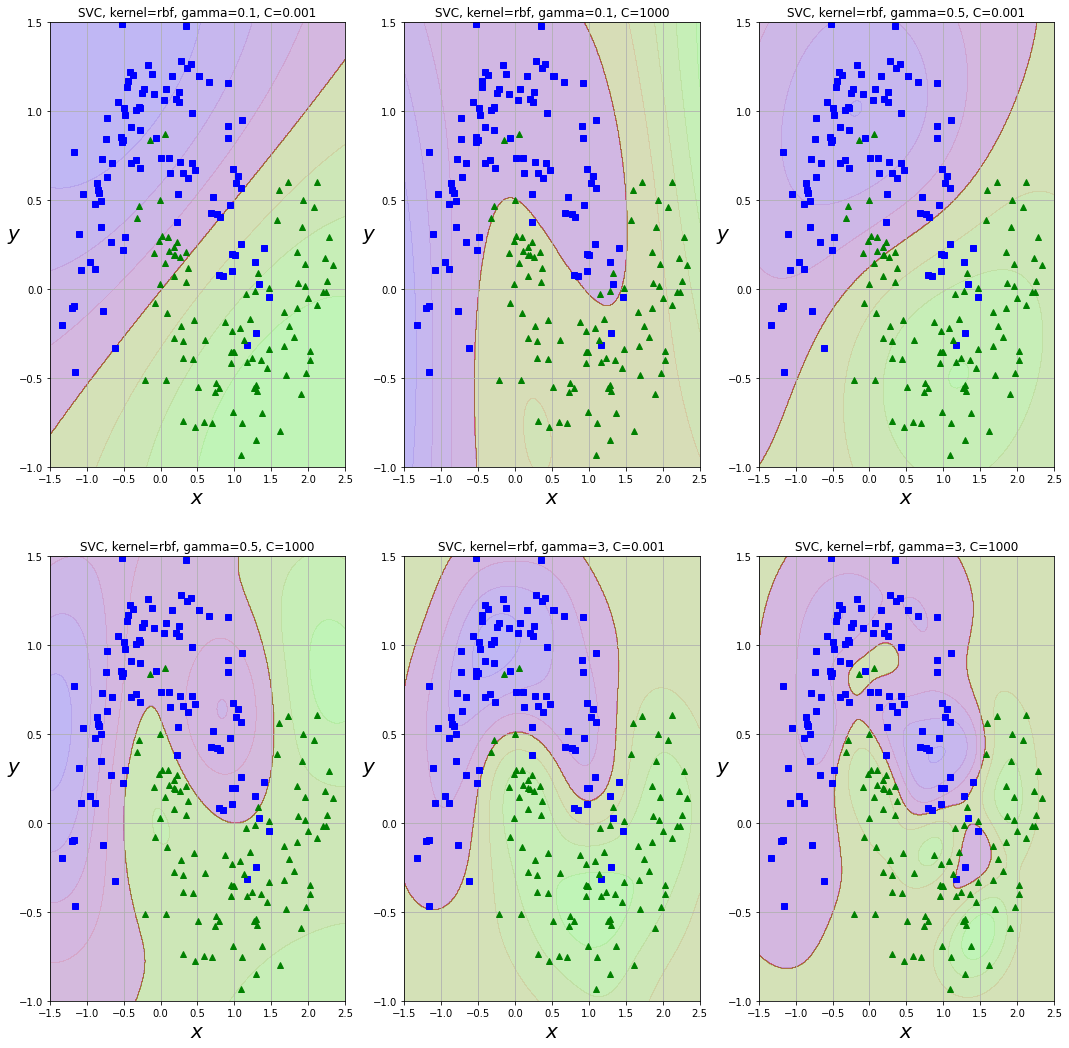

In [ ]:
plt.figure(figsize=(18, 18))
axes = [-1.5, 2.5, -1, 1.5]

for i, par in enumerate(parameters_grid):
  plt.subplot(2, 3, i+1)
  clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=par[0], C=par[1]))
    ])
  clf.fit(X, Y)
  plot_predictions(clf, axes)
  plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "bs")
  plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x$", fontsize=20)
  plt.ylabel(r"$y$", fontsize=20, rotation=0)
  plt.title(f'SVC, kernel=rbf, gamma={par[0]}, C={par[1]}')

_Визуально лучший результат получен, когда параметр gamma=0.5, а C=1000._

#### Дополнительно 

На рисунке, который вы получите для gamma=5, C=1000, есть области, в которых нет никаких точек. 

Эти области "явно" расположены ближе к синим точкам, чем к желтым. 

Однако, по какой-то причине, модель в этих областях принимает решение не в пользу синих точек. 

Почитайте подробнее про то, как устроено ядро rbf и попытайтесь объяснить наблюдаемый феномен

# Предсказание растворимости веществ

Загрузим недавно опубликованный датасет [AqSolDB](https://www.nature.com/articles/s41597-019-0151-1), объединяющий информацию о растворимости химических веществ из разных источников. 



In [ ]:
!wget  https://kodomo.fbb.msu.ru/FBB/year_20/ml/curated-solubility-dataset.csv

--2022-10-06 19:55:14--  https://kodomo.fbb.msu.ru/FBB/year_20/ml/curated-solubility-dataset.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3750208 (3.6M) [text/csv]
Saving to: ‘curated-solubility-dataset.csv.1’

curated-solubility- 100%[===================>]   3.58M  9.26MB/s    in 0.4s    

2022-10-06 19:55:14 (9.26 MB/s) - ‘curated-solubility-dataset.csv.1’ saved [3750208/3750208]



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("curated-solubility-dataset.csv")

In [ ]:
data.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


В качестве Y используйте колонку **Solubility**

In [ ]:
Y = data['Solubility']

В качестве X - все колонки после Solubility

In [ ]:
X = data.iloc[:, 9:] #Взял только начиная с MolWt
X.head()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


Разбейте ваши данные на обучение и тест в отношении 8:2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Попробуйте на данной задаче и на основе только посчитанных авторами признаков (начинаются с MolWt), предсказать растворимость веществ при помощи:

1. Линейной регрессии

2. KNN-регрессии

3. SVM (понадобится SVR из пакета)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Так как у второго и третьего алгоритма есть гиперпараметры, то сначала на трейне используйте GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

Для SVR используйте те же параметры, что указаны в ячейке. 
Для KNN - число соседей

In [ ]:
from sklearn.svm import LinearSVR
parameters = {'C':[0.01, 0.1, 1, 10]}
svc = LinearSVR(max_iter=10000)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'C': 0.01}

In [ ]:
parameters = {'kernel': ['rbf'], 
              'C':[0.01, 0.1, 1, 10]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, Y_train)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
parameters = {'n_neighbors': [i for i in range(1, 51)]}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, Y_train)
clf.best_params_

{'n_neighbors': 9}

Выберите лучший на кросс-валидации алгоритм

_Поскольку у нас есть уже разбиаение на тренировочную и тестовую выборку, то имеет смысл использовать KFold кросс-валидацию, возьмём KFold:_

In [ ]:
from sklearn.model_selection import KFold
 
knn_model = KNeighborsRegressor(n_neighbors=9)
svr_model_linear = LinearSVR(C=0.01)
svr_model_rbf = SVR(kernel = 'rbf', C=10)
linear_model = LinearRegression()

In [ ]:
def quality(clf, X_train, Y_train):  
  r2, MAE, MSE = [], [], []
  cv = KFold(n_splits=5, shuffle=True, random_state=1)
  for train_index, test_index in cv.split(X_train, Y_train):
      X_train_, y_train_ = X_train.iloc[train_index], Y_train.iloc[train_index]
      X_val, y_val = X_train.iloc[test_index], Y_train.iloc[test_index]
      scaler = StandardScaler().fit(X_train_)
      X_train_ = scaler.transform(X_train_)
      X_val = scaler.transform(X_val)
      clf.fit(X_train_, y_train_)
      pred = clf.predict(X_val)
      r2.append(r2_score(y_val, pred))
      MAE.append(mean_absolute_error(y_val, pred))
      MSE.append(mean_squared_error(y_val, pred))
  return [np.array(r2).mean(), np.array(MAE).mean(), np.array(MSE).mean()]

In [ ]:
print(f'KNN: R2={quality(knn_model, X_train, Y_train)[0]}, MAE={quality(knn_model, X_train, Y_train)[1]}, MSE={quality(knn_model, X_train, Y_train)[2]}')
print(f'SVR_linear: R2={quality(svr_model_linear, X_train, Y_train)[0]}, MAE={quality(svr_model_linear, X_train, Y_train)[1]}, MSE={quality(svr_model_linear, X_train, Y_train)[2]}')
print(f'SVR_rbf: R2={quality(svr_model_rbf, X_train, Y_train)[0]}, MAE={quality(svr_model_rbf, X_train, Y_train)[1]}, MSE={quality(svr_model_rbf, X_train, Y_train)[2]}')
print(f'Linear: R2={quality(linear_model, X_train, Y_train)[0]}, MAE={quality(linear_model, X_train, Y_train)[1]}, MSE={quality(linear_model, X_train, Y_train)[2]}')

KNN: R2=0.7281197580667318, MAE=0.8712044958953218, MSE=1.5293650588704348
SVR_linear: R2=0.4213395419673839, MAE=1.19477919779407, MSE=3.2590689002903077
SVR_rbf: R2=0.7515946448560957, MAE=0.8056863411234619, MSE=1.3980081284621517
Linear: R2=0.4883989528686983, MAE=1.2357812170204354, MSE=2.879354972888204


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

_Исходя из метрик выше, выберем SVR с ядром rbf._

Проверьте финальную модель на тесте

In [ ]:
svr_model_rbf.fit(X_train, Y_train)
Y_pred = svr_model_rbf.predict(X_test)
print(f'R2: {r2_score(Y_test, Y_pred)}, MAE: {mean_absolute_error(Y_test, Y_pred)}, MSE: {mean_squared_error(Y_test, Y_pred)}')


R2: 0.7484372799039876, MAE: 0.7970628917274278, MSE: 1.387398917329155


Какие проблемы вы видите в случайном разбиении, примененом нами

_Не были использованы никакие биологические признаки._

# Классификация мутаций при помощи deltaSVM 

Качать файлы из сети в коллабе можно при помощи команды **wget**

`!wget`

Скачайте файл [aldobecr11_seqs.tsv](https://kodomo.fbb.msu.ru/FBB/year_21/aldobecr11_seqs.csv) с прошлого семинера, в который добавили последовательности длины 21 нуклеотид, окружающие замену

In [1]:
!wget https://kodomo.fbb.msu.ru/FBB/year_21/aldobecr11_seqs.csv

--2022-10-14 18:32:24--  https://kodomo.fbb.msu.ru/FBB/year_21/aldobecr11_seqs.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204816 (200K) [text/csv]
Saving to: ‘aldobecr11_seqs.csv’

aldobecr11_seqs.csv 100%[===================>] 200.02K   578KB/s    in 0.3s    

2022-10-14 18:32:26 (578 KB/s) - ‘aldobecr11_seqs.csv’ saved [204816/204816]



In [4]:
data = pd.read_csv("aldobecr11_seqs.csv")

Загрузите веса deltaSVM для клеточной линии [HepG2](https://kodomo.fbb.msu.ru/FBB/year_21/hepg2.out) 

In [5]:
!wget https://kodomo.fbb.msu.ru/FBB/year_21/hepg2.out

--2022-10-14 18:32:50--  https://kodomo.fbb.msu.ru/FBB/year_21/hepg2.out
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49891497 (48M)
Saving to: ‘hepg2.out’

hepg2.out           100%[===================>]  47.58M   482KB/s    in 94s     

2022-10-14 18:34:24 (520 KB/s) - ‘hepg2.out’ saved [49891497/49891497]



Далее идет код для работы с весами deltaSVM

In [6]:
from dataclasses import dataclass, field
from typing import Dict, Tuple, Union, Optional, Generator
from pathlib import Path

def reverse_complement(seq: str, alphabet: Optional[Dict[str, str]] = None) -> str:
    if alphabet is None:
        alphabet = {"A": "T", "C": "G", "G": "C", "T": "A"}
    rev_compl = []
    for s in reversed(seq):
        rev_compl.append(alphabet[s])
    return "".join(rev_compl)

def kmer_split(seq: str, k: int) -> Generator[str, None, None]:
    if k <= 0:
        raise Exception(f"k must be positive: {k}")
    if len(seq) < k:
        raise Exception(
            f"Length of sequence must be equal or greater than k, {k} vs {len(seq)}"
        )

    for i in range(0, len(seq) - k + 1, 1):
        yield seq[i : i + k]

@dataclass
class SVMDelta:
    scores: Dict[str, float] = field(repr=False)
    k: int
    distinct_reversed: bool = False

    def __post_init__(self) -> None:
        self._check_scores()

    def _check_scores(self) -> None:
        kmers_cnt = 4 ** self.k
        if kmers_cnt != len(self.scores):
            raise Exception(
                "Scores doesn't include information about all kmers."
                f"Entries: {len(self.scores)}. Required: {kmers_cnt}"
            )

    @staticmethod
    def _check_seq(seq: str) -> None:
        for s in seq:
            if s not in ("A", "T", "G", "C"):
                raise Exception(f"Sequence must contain only A, T, G and C: {s}")

    def decision_function(self, seq: str) -> float:
        self._check_seq(seq)
        score = 0.0

        for kmer in kmer_split(seq, self.k):
            score += self.scores[kmer]
        return score

    def _trunc_seq(self, seq: str, pos: int) -> Tuple[str, int]:
        ss = max(0, pos - self.k + 1)
        se = min(len(seq), pos + self.k)
        return seq[ss:se], pos - ss

    @staticmethod
    def _get_alt_seq(seq: str, pos: int, alt: str) -> str:
        return seq[:pos] + alt + seq[pos + 1 :]

    def score_snv(self, seq: str, pos: int, alt: str) -> float:
        seq, pos = self._trunc_seq(seq, pos)
        ref_seq = seq
        alt_seq = self._get_alt_seq(seq, pos, alt)
        ref_score = self.decision_function(ref_seq)
        alt_score = self.decision_function(alt_seq)
        return alt_score - ref_score

    @staticmethod
    def _check_save_path(path: Path, exists_ok: bool = True) -> None:
        if path.exists():
            if not exists_ok:
                raise Exception(f"Provided path exists: {path}")
            if not path.is_file():
                raise Exception(f"Provided path is not a file: {path}")

    def save(self, path: Union[Path, str], exist_ok: bool = True) -> None:
        path = Path(path)
        self._check_save_path(path, exist_ok)
        with open(path, "w") as out:
            for kmer, score in self.scores.items():
                print(f"{kmer}\t{score}", file=out)

    @staticmethod
    def _check_load_path(path: Path) -> None:
        if not path.exists():
            raise Exception(f"Provided path doesn't exist: {path}")
        if not path.is_file():
            raise Exception(f"Provided path is not a file: {path}")

    @classmethod
    def load(cls, path: Union[Path, str], distinct_reversed: bool = False):
        path = Path(path)
        cls._check_load_path(path)
        dt: Dict[str, float] = {}
        with open(path, "r") as k_scores:
            seq, _ = k_scores.readline().split()
            k = len(seq)
            k_scores.seek(0)

            for ind, line in enumerate(k_scores):
                seq, score_s = line.split()
                score = float(score_s)
                if len(seq) != k:
                    raise Exception(
                        f"Provided file contains kmers of different size: line {ind}. "
                        f"Expected {k}, got {len(seq)}"
                    )
                dt[seq] = score
                if not distinct_reversed:
                    r_seq = reverse_complement(seq)
                    dt[r_seq] = score
        return cls(dt, k, distinct_reversed=distinct_reversed)

In [7]:
data.head(5)

,Chrom,Pos,Ref,Alt,Value,Confidence,construction,seq
0,9,104195570,T,A,-0.152173,0.034332,ALDOB,TAAACTATTTTCTTCAATCTG
1,9,104195570,T,C,-0.117352,0.018132,ALDOB,TAAACTATTTTCTTCAATCTG
2,9,104195570,T,G,-0.120354,0.019410,ALDOB,TAAACTATTTTCTTCAATCTG
3,9,104195670,G,A,-1.084990,0.242714,ALDOB,TGGGATTAAAGGTCTGTACCA
4,9,104195670,G,C,-1.583880,0.373388,ALDOB,TGGGATTAAAGGTCTGTACCA


In [8]:
model = SVMDelta.load("hepg2.out")


In [9]:
print(model._get_alt_seq('AAAAAAAAAAT', 10, 'A'))
print(model.score_snv('AAAAAAAAAAT', 10, 'C'))

AAAAAAAAAAA
0.16665723999999998


Пример запуска - оценим вклад замены в середине последовательности 

In [10]:
deltaSVM = 0
for i in range(11):
  deltaSVM += model.score_snv(data.seq[0][i:i+11], 10-i, data.Alt[0]) 
  print(data.seq[0][i:i+11], 10-i, data.Alt[0])
  print(model._get_alt_seq(data.seq[0][i:i+11], 10-i, data.Alt[0]))

print(f'Score для первой строки: {deltaSVM}')

TAAACTATTTT 10 A
TAAACTATTTA
AAACTATTTTC 9 A
AAACTATTTAC
AACTATTTTCT 8 A
AACTATTTACT
ACTATTTTCTT 7 A
ACTATTTACTT
CTATTTTCTTC 6 A
CTATTTACTTC
TATTTTCTTCA 5 A
TATTTACTTCA
ATTTTCTTCAA 4 A
ATTTACTTCAA
TTTTCTTCAAT 3 A
TTTACTTCAAT
TTTCTTCAATC 2 A
TTACTTCAATC
TTCTTCAATCT 1 A
TACTTCAATCT
TCTTCAATCTG 0 A
ACTTCAATCTG
Score для первой строки: 5.18448222


Для каждой строки таблицы посчитайте вклад замены, оценный при помощи deltaSVM.


In [11]:
deltaSVM = 0
scores = np.array([])
for i in range(data.shape[0]):
  for j in range(11):
    deltaSVM += model.score_snv(data.seq[i][j:j+11], 10-j, data.Alt[i])
    #print(deltaSVM)
  scores = np.append(scores, [deltaSVM])
  deltaSVM = 0
print(scores)

[ 5.18448222  1.3833344   6.55020694 ... -0.89493796 -3.46414218
 -1.79927278]


Оцените корреляцию Value и полученного скора

In [12]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [13]:
print(pearsonr(scores, data.Value))
print(spearmanr(scores, data.Value))
print(kendalltau(scores, data.Value))

(0.32072604559582985, 3.749524081708883e-64)
SpearmanrResult(correlation=0.27904693774136974, pvalue=2.2871948237676325e-48)
KendalltauResult(correlation=0.19074654049054687, pvalue=8.284508397299158e-49)


_Все 3 критерия далеки от 1, но p-value очень малы (даже если взять множественную проверку гипотез, то ничего кардинально не изменится). Таким образом, корреляция есть, причём с очень большой уверенностью в результате._

Постройте график зависимости deltaSVM скора от колонки Value в файле aldobecr11.tsv

Text(0, 0.5, 'Score')

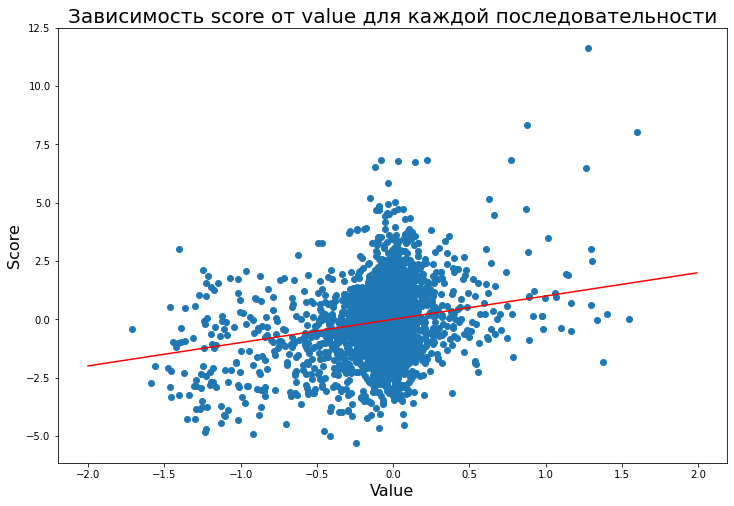

In [18]:
line = np.arange(-2, 2, 0.01)
plt.figure(figsize=(12, 8))
plt.scatter(data.Value, scores)
plt.plot(line, line, 'r')
plt.title('Зависимость score от value для каждой последовательности', fontsize=20)
plt.xlabel('Value', fontsize=16)
plt.ylabel('Score', fontsize=16)


_Прослежижвается некоторая корреляция с прямой вида Score=Value, как раз на неё по всей видимости указывают все 3 коэф-та. По графику как раз наблюдается некоторая зависимость (красная прямая)._

## "Парадокс"

_В этой задаче, как мы разобрали на лекции, нужно было использовать множественную проверку гипотез! Этот "парадокс" сроден с экспериментом, который проводили около 100-150 лет назад: пытались выявить экстрасенсов по выбору шкатулок из 10 штук. Из пары тысяч человек нашлось 11 человек, которые правильно выбрали 9+ шкатулок (а двое вообще угадали все 10, точно экстрасенсы). Та же ошибка, что и здесь - при большом количестве "измерений" у нас накапливается ошибка, причём чем больше экспериментов, тем больше ошибка (а у нас как раз здесь 2 миллиона значений, без обработки специальными метдоми контроля ошибок, чем являются FDR и FWER, кстати, мы можем получить вообще всё что угодно). Поэтому и метод SelectFDR использует в себе один из методов контроля, после его использования ничего хорошего мы не найдём, что закономерно (поскольку правильные поправки сделаны)._

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

Создадим таблицу 200 на 10000 со "здоровыми" и "больными" пациентами и данными об "экспрессии" их генов. 


In [ ]:
gene_count = 10000
genes = [f"Gene{ind}" for ind in range(gene_count)]
healthy = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                        loc=0, 
                                        scale=1), 
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                         loc=0, 
                                         scale=1),
                        columns=genes)
diseased['State'] = "D"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,-1.079139,-0.760206,-0.059752,-2.470984,-1.257950,-0.977479,-1.396747,-0.669245,-0.472305,0.330614,...,-1.106984,-0.849591,0.027725,0.164212,-0.214543,0.102617,0.433335,0.596732,-1.419522,H
1,1.645405,-1.495216,0.489676,-0.808007,-0.301217,-1.095194,-1.235838,-0.756847,-1.233191,0.077444,...,0.519630,1.291345,-1.049551,1.427400,0.901737,-0.811713,-1.686247,0.265032,1.429690,H
2,-0.987187,-0.007065,1.022383,0.512163,-0.684051,-2.129797,1.319179,0.422449,0.897358,0.708841,...,0.917690,-0.500913,0.829075,-0.457038,0.719782,0.319485,-1.941128,0.239869,-0.297758,H
3,0.039418,-0.745653,1.113504,1.748771,0.502229,-1.287907,-1.886915,1.422074,-0.437107,-0.319869,...,0.062688,-0.533752,-2.628079,1.066811,0.336632,-0.741356,0.953126,0.508311,-0.279267,H
4,0.827644,-0.872187,-0.849713,2.160878,1.081405,-0.444321,0.504029,-1.148746,0.073896,0.439365,...,0.944379,0.362792,0.703141,0.598651,-0.858600,1.122314,-0.001957,0.870660,0.150855,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.277118,1.195749,0.623951,-0.606130,-0.372736,1.360378,-0.054214,-1.012327,0.609329,-1.813450,...,-0.278098,0.726282,-0.316341,1.032880,-0.495381,-0.979175,0.749546,-0.495849,1.845578,D
96,-0.041308,1.756671,0.056931,0.646196,-0.798781,-0.502038,0.386759,-0.825648,0.870815,0.877354,...,0.108966,0.645039,0.033087,-0.360646,-0.326171,-0.029689,-2.188762,-1.175346,1.338483,D
97,-0.044599,0.844129,1.087383,2.561087,-1.973024,-1.264739,-0.122588,0.504544,-1.494074,1.352997,...,1.021165,0.758448,-1.483194,1.838659,-0.022117,0.892543,0.132951,-1.012754,-1.540253,D
98,0.773089,1.071919,-1.128021,0.612453,-0.387502,0.055309,1.737126,0.650571,1.786499,1.172167,...,1.208897,1.928722,-0.989840,-0.058914,0.409081,-0.482748,0.435163,0.124818,0.838251,D


In [ ]:
X = patients.drop("State", axis=1)
Y = patients['State']

In [ ]:
top_k = 10

diffs = X[Y == "H"].mean(axis=0) - X[Y == 'D'].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index

In [ ]:
X_selected = X[genes]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y == "D", test_size=0.3)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_train_pred = model.predict_proba(X_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Train quality:
ROCAUC : 0.87
PRAUC : 0.88
Accuracy: accuracy 0.78


In [ ]:
y_test_pred = model.predict_proba(X_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Test quality:
ROCAUC : 0.89
PRAUC : 0.88
Accuracy: accuracy 0.80


Очевидно, что мы не могли выучить никаких разумных признаков. Однако, мы их все же выучили... Объясните полученный парадокс

Тем не менее, может мы просто что-то делаем не так. Попробуем встроенные в sklearn методы для выбора признаков

In [ ]:
from sklearn.feature_selection import (SelectKBest, SelectFdr, SelectFwe,
                                       SelectPercentile, f_classif)

In [ ]:
X_selected = SelectKBest(f_classif, k=10).fit_transform(X, Y)

Повторите все на отобранных стандартным методом sklearn признаках. Результат объясните

Что делает метод выделения признаков SelectFdr? Что такое FDR? Опишите ниже

Примените метод SelectFdr. Результат объясните

Почему вообще возникла проблема в начале? Объясните

Как бы эту проблему можно было бы избежать?